# Chapter 9 Introduction to IP Routing

IP Routing is the process of moving packets from one network to another using routers. This process is super important to understand because it pertains to all routers and configurations that use IP

Routing protocol- a tool used by routers to dynamically find all the networks in the internetwork, as well as ensure that all routers have the same routing table
-	Basically a routing protocol determines the path of a packet through an internetwork
-	RIP
-	EIGRP
-	OSPF
-	A set of processes, algorithms, and messages that are used to exchange routing information and populate the routing table with the routing protocol's choice of best paths. 

Routed Protocols
- Once all routers know about all networks, a routed protocol can be used to send user data (packets) through the established internetwork
-	Assigned to an interface
-	Determine the method of packet delivery
-	IP and IPv6

Once you create an internetwork by connecting your WAN’s and LAN’s to a router, you need to configure logical network addresses (IP addresses) to all hosts on network so that they can communicate via routers across that internetwork
-	Routing- refers to the process of taking a packet from one device and sending it through the network to another device on a different network.
-	Routers don’t really care about hosts, they care about networks and the best path to get packets to a network
-	Logical network address of destination host is used to get packets to a network through a routed network, and then the hardware address of the host is used to deliver the packet from a router to the correct destination host
- In order for a router to route packets it must know:
    1. Destination Address
    2. Neighbor routers from which it can use to learn about remote networks
    3. Possible routes to all remote networks
    4. The best route to each remote network
    5. How to maintain and verify routing information
    
- The router learns about remote networks from its neighboring routers or from an administrator


- Then router builds a routing table (a map of the internetwork) that describes how to find and get to the remote networks
- If a network is directly connected the router knows how to get there, but if its not directly connected it must use static or dynamic routing to learn how to get to it

Static and Dynamic Routing

How does a router send packets to remote networks when the only way it can send them is by looking at the routing table to find out how to get to the remote networks?

What happens when a router receives a packet for a network that isn’t listed in the routing table?
Ans: The router just discards the packet. End of story.


Static Routing

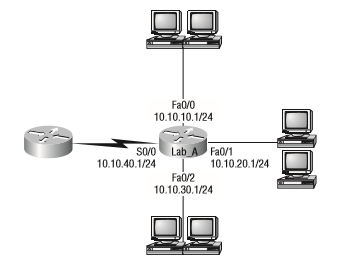!



- Static routing
    - can be a lot of work because someone has to manually enter all network locations into the routing table
    - Provides ease of routing table maintenance in smaller networks that wont need to scale
    - Routing to and from a stub network, which is a network with only one default route out and no knowledge of any remote networks
    - Accessing a single default route
    
-	Dynamic routing
    - a protocol on one router communicates with the same protocol running on neighbor routers
    - The routers then update each other about all the networks they know about and place this info into the routing table
    - If a change occurs in the network, the dynamic routing protocols can update the routing table whereas with static routing the admin would be responsible for updating changes
    - In a large network especially, a combination of dynamic and static routing is being used
    
    - C means directly connected
    - Split into two categories 
        - Interior Gateway Protocols (IGP)
        - Exterior Gateway Protocols (EGP)
        - The purpose of dynamic routing protocols includes:
            1. Discovery of remote networks
            2. Maintaining up-to-date routing information
            3. Choosing the best path to destination networks
            4. Ability to find a new best path if the current path is no longer available

        - The difference is interior or exterior routing of an AS. Autonomous system is a collection of networks or subnets in the same domain (ex: your network)
        - So basically IGP works within the network and EGP works outside the network or between networks
        - Dyamic routing protocols save us a lot of time and energy when configuring routers
        - However we still have to tell the protocols what to do
    - IGP splits into two more categories
        1. Distance vector (RIP- Routing Information Protocol, IGRP- Interior Gateway Routing Protocol)
        2. Link State (OSPF- Open Shortest Path First, IS-IS- Intermediate System-to-Intermediate System)
        
-	Administrative Distance (AD) 
    - is used to rate the trustworthiness of routing information received on one router from its neighbor router
    - An integer from 0 – 255
    - 0 = most trusted route
    - 255 = least
    - If a router receives two updates listing the same remote network, the first thing the router does is check the AD to see which one is lowest
    - If both routes have the same AD, then routing-protocol metrics like hop count or amount of bandwidth are used to find best remote network
    - A directly connected network would have an AD of 0 and the router will always use that as route
    - As static route has a default AD of 1 and the router will believe a static route to be the preferred one over any that it learns. You can change this value though
    
Classes of Routing Protocols
-	Distance Vector
    - Finds the best path to a remote network by distance. 
    - Each time a packet goes through a router, it is called a hop
    - The route with the fewest hops to the network is determined to be the best route
    - They send the entire routing table to all directly connected neighbors
    - IGRP and RIP1.	
    0 Passes complete routing-table contents to neighboring routers, which then combine the received routing-table entries with their own routing tables to complete the routers routing table
    - Routing by rumor
        - We are trusting our neighbor to tell us the right updated information
    - Its possible to have a network that has multiple links to the same remote network
    - AD is checked first and with Distance Vectors, the hop count is the only other metric checked next
    - If a router finds more than one link with the same hop count, it preforms round-robin load balancing
    - First the four routers have only the directly connected routers listed in their routing table
    
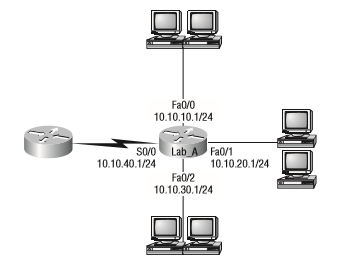

    - Then a routing protocol was configured on each router and the tables were automatically updated 
    
    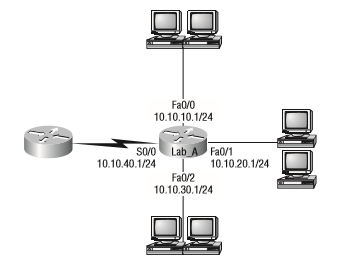
    
- The remote network number
- The interface the router uses
- The hop count, or metric to the network

-	Link State
     - Shortest path first protocols
     - Router creates 3 separate tables
     - One table keeps track of directly attached neighbors, one determines the topology of the entire internetwork, and one is the actual routing table
     - These routers know more about the internetwork than any distance vector routing protocol
     - OSPF and IS-IS
     - Send updates containing the state of their own links to all other routers on the network
-	Hybrid
    - Uses aspects of both (EIGRP is the only one)
    - Cisco Proprietary protocol
    
-	There is no set way of configuring routing protocols for use in every situation its more on a case-by-case basis

-	Distance Vector


    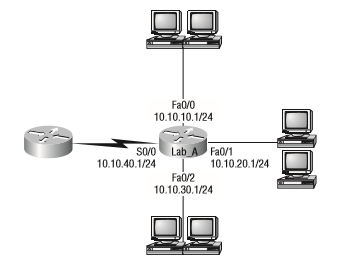
What would happen to a received packet that has a destination IP Address of 10.10.10.10?
	Ans: The router will packet-switch the packet to interface Fa0/0 and this interface will then frame the packet and send it out on the network segment

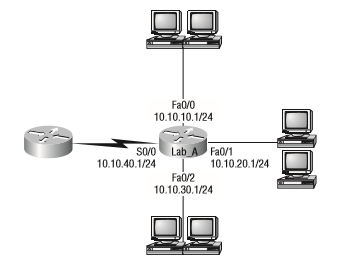



RIP
-	Sends the routing table to all active interfaces every 30 seconds
-	Uses ONLY the hop count to determine best way to remote network
-	Has a maximum hop count of 15 (16 would be unreachable)
-	Works well in small networks but pretty inefficient on large networks
-	Classful routing- all devices in the network must use the same subnet mask, because it doesn’t send updates with subnet mask information 

RIP v2
-	Considered classless because subnet information is sent with each route update
-	AD 120
-	Open standard so you can use it with any brand of router

VLSM
-	Classless (sends subnet info)
-	Saves address space
-	If we didn’t use a routing protocol that supports VLSM, then every router interface, (PC, Printer, Server, etc) would have to use the same subnet mask
-	Pg. 320 if anyone wants more details
-	Basically by using it you save a lot of IP addresses

EIGRP
- Classless, enhanced distance-vector protocol
- IGRP is not supported by cisco anymore
- Advertises subnets which allows us to use VLSM
- Hybrid because it sends traditional distance vector updates containing info on networks and cost to reach and not link-state packets (OSPF)
- Synchronizes routing tables between neighbors at startup and then sends specific updates only when topology changes occur
- Great for large networks
- Simple to configure
- Has the additional tables 
    - Neighbor IP table
        - State information on neighbor routers stored in RAM
    - Topology table
        - Populated by the neighbor table
        - Contains all destinations advertised by neighbors, holding each destination address 
        - Advanced metric from neighbors routing table is recorded
        - Contains feasible successor backup routes
        - By having feasible successor in the topology table as backup links, the network can converge instantly
        - Make it very fast, scalable and fault tolerant 
OSPF
- Open Shortest Path First
- Uses Dijkstra algorithm
- First a shortest path tree is constructed, and then the routing table is populated with the resulting best paths
- Has unlimited hop count
- Minimizes routing update traffic
- Scalbility
- Should be designed hierarchical where you can sperate the larger internetwork into smaller internetworks called areas
- This decreases routing overhead, speeds up, and confines network instability to single areas of the network

The IP Routing Process
-	The routing process is fairly simple and doesn’t change regardless of the size of the network
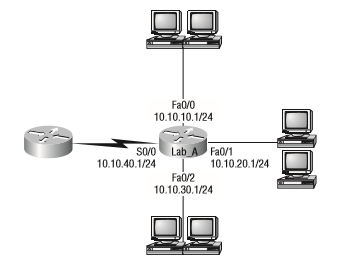

-	What happens when Host_A wants to communicate with Host_B on a different network?
-	A packet is created on host
    1. ICMP creates an echo request payload (ping)
    2. ICMP hands that payload to IP, which creates a packet
        - At minimum this packet contains an IP source address, an IP destination address, and a protocol field with 01h
        - Just tells receiving host who to hand the payload to when destination is reached (ICMP)
    3. After the packet is created, IP determines whether the destination IP address is on the local or remote network
    4. IP discovered it is a remote request, the packet needs to be sent to the default gateway so the packet can routed to the correct network
        - The registry in windows is parsed to find the configured default gateway
    5. Based on diagram we know default gateway is 172.16.10.1. So for this packet to be sent there, the hardware address of the routers interface E0 must be known.
    - Why? So the packet can be handed down to the data link layer, framed and sent to the routers interface that’s connected to the 172.16.10.0 network
    - Basically we need to get the MAC address of the default gateway because hosts only communicate via hardware addresses on the local LAN
    6. ARP cache of the host is checked to see whether the IP address of the default gateway has already been resolved to a hardware address. If it has, the packet is then free to be handed to the data link layer for framing (MAC address is handed down with packet)
    - Arp -a
    - If hardware address isn’t in ARP cache, an ARP broadcast is sent out onto local network to search for hardware address of gateway
7.	A frame is then generated encapsulating the packet with control information
    - Contains hardware destination and source address
    - Ether-type field that describes the network layer protocol that handed the packet to the data link layer (IP)
    - Frame check sequence (FCS) that houses the result of the cyclic redundancy check
    - Host_A’s MAC address and MAC destination address of the default gateway
    - Does not include the remote host’s MAC address
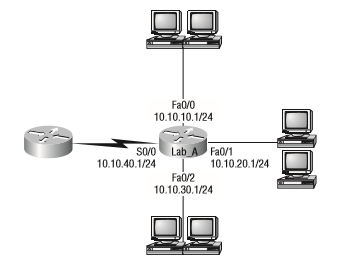

Router receives the packet
9.	Every device within collision domain receives those bits and builds the frame
     - they run a CRC and check the answer in the FCS field
     - If frame matches then the hardware destination address is checked and the ether-type field is checked to find the protocol used at the network layer
10.	Packet is pulled from frame, packet is handed to protocol listed and given to (IP)
    - Router routes the packet
11.	IP receives the packet and checks the IP destination address
    - Because destination address doesn’t match any addresses configure, the router will look up destination IP in routing table
12.	The routing table must have an entry for the network or the packet will be discarded immediately and an ICMP message will be sent back to the originating device with a “destination-network-unreachable” message
13.	If the router does find an entry for the destination network in its table, the packet is switched to the exit interface
    - No routing protocols are needed for this example because they are directly connected 
Pg. 294 

What to remember
1.	The frame changes at each hop but the packet is never changed or manipulated until it reaches its destination
2.	MAC address is always local and will only be used on the LAN. It will never pass the Routers interface
3.	A frame uses MAC address to send a packet on the LAN. The frame will take the packet to either a host on the LAN or a routers interface if the packet is destined for a remote network
4.	Difference between static and dynamic routing: 

Routing Protocols Chapter 10
-	Dynamic routing protocols run only on routers that use them in order to discover networks and update their routing tables
-	Using dynamic routing protocols is easier on the sys admin but will cost in terms of router CPU processes and bandwidth on the network links. 

How to configure a router
- router modes
- Entering global configuration mode
- Names
- Passwords
- Password encryption
- Interface names
- Moving between interfaces
- Configuring serial int’s, fast ethernet, gigabit ethernet
- Motd
- Login banner
- Clock time zone
- Local host name to IP address
- No ip domain-lookup
- Logging synchronous
- Exec-timeout
- Save



